In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [92]:
df = pd.read_csv("train.csv")

In [93]:
df.shape

(1460, 81)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [95]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [96]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Checking missing values

In [97]:
missing_values = round(df.isnull().sum()/len(df), 2).sort_values(ascending=False)
missing_values

PoolQC         1.00
MiscFeature    0.96
Alley          0.94
Fence          0.81
FireplaceQu    0.47
               ... 
ExterQual      0.00
Exterior2nd    0.00
Exterior1st    0.00
RoofMatl       0.00
SalePrice      0.00
Length: 81, dtype: float64

## Dropping columns with more than 15% of missing values

In [98]:
missing_values[missing_values > 0.15]
col_to_drop1 = list(missing_values[missing_values > 0.15].index)

In [99]:
df.drop(col_to_drop1, axis=1, inplace=True)
df.shape

(1460, 75)

## Calculating the age in year when the house was built, Remoded, Garage was build and was sold

In [100]:
df['YearBuilt_age'] = df['YearBuilt'].max() - df['YearBuilt']
df['YearRemodAdd_age'] = df['YearRemodAdd'].max() - df['YearRemodAdd']
df['GarageYrBlt_age'] = df['GarageYrBlt'].max() - df['GarageYrBlt']
df['YrSold_age'] = df['YrSold'].max() - df['YrSold'] 

In [101]:
col_to_drop2 = ['YrSold', 'GarageYrBlt', 'YearRemodAdd', 'YearBuilt']

In [102]:
df.drop(col_to_drop2, axis=1, inplace=True)
df.shape

(1460, 75)

## Imputing missing values with mean and mode

In [103]:
df.MasVnrArea.fillna(df.MasVnrArea.mean(), inplace=True)
df.MasVnrType.fillna(df.MasVnrType.value_counts().index[0], inplace=True)
df.BsmtCond.fillna(df.BsmtCond.value_counts().index[0], inplace=True)
df.BsmtQual.fillna(df.BsmtQual.value_counts().index[0], inplace=True)
df.BsmtExposure.fillna(df.BsmtExposure.value_counts().index[0], inplace=True)
df.BsmtFinType1.fillna(df.BsmtFinType1.value_counts().index[0], inplace=True)
df.BsmtFinType2.fillna(df.BsmtFinType2.value_counts().index[0], inplace=True)
df.GarageType.fillna(df.GarageType.value_counts().index[0], inplace=True)
df.GarageYrBlt_age.fillna(-1, inplace=True)
df.GarageFinish.fillna(df.GarageFinish.value_counts().index[0], inplace=True)
df.GarageQual.fillna(df.GarageQual.value_counts().index[0], inplace=True)
df.GarageCond.fillna(df.GarageCond.value_counts().index[0], inplace=True)

In [104]:
df.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [105]:
df.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [106]:
col_to_drop3 = ['Id','Utilities', 'Street', 'MoSold']

In [107]:
df.drop(col_to_drop3, axis=1, inplace=True)

In [108]:
df.shape

(1460, 72)

## Exploratory Data Analysis for some numerical variables

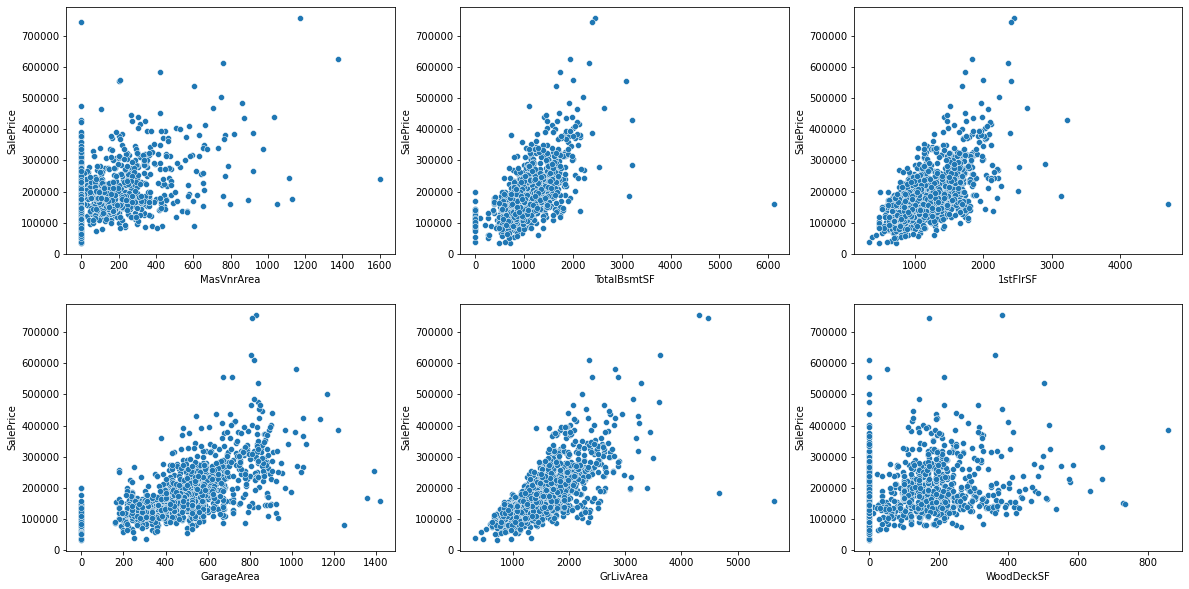

In [74]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(df.MasVnrArea, df.SalePrice)
plt.subplot(2, 3, 2)
sns.scatterplot(df.TotalBsmtSF, df.SalePrice)
plt.subplot(2, 3, 3)
sns.scatterplot(df['1stFlrSF'], df.SalePrice)
plt.subplot(2, 3, 4)
sns.scatterplot(df.GarageArea, df.SalePrice)
plt.subplot(2, 3, 5)
sns.scatterplot(df.GrLivArea, df.SalePrice)
plt.subplot(2, 3, 6)
sns.scatterplot(df.WoodDeckSF, df.SalePrice)
plt.show()

## Correlation Analysis

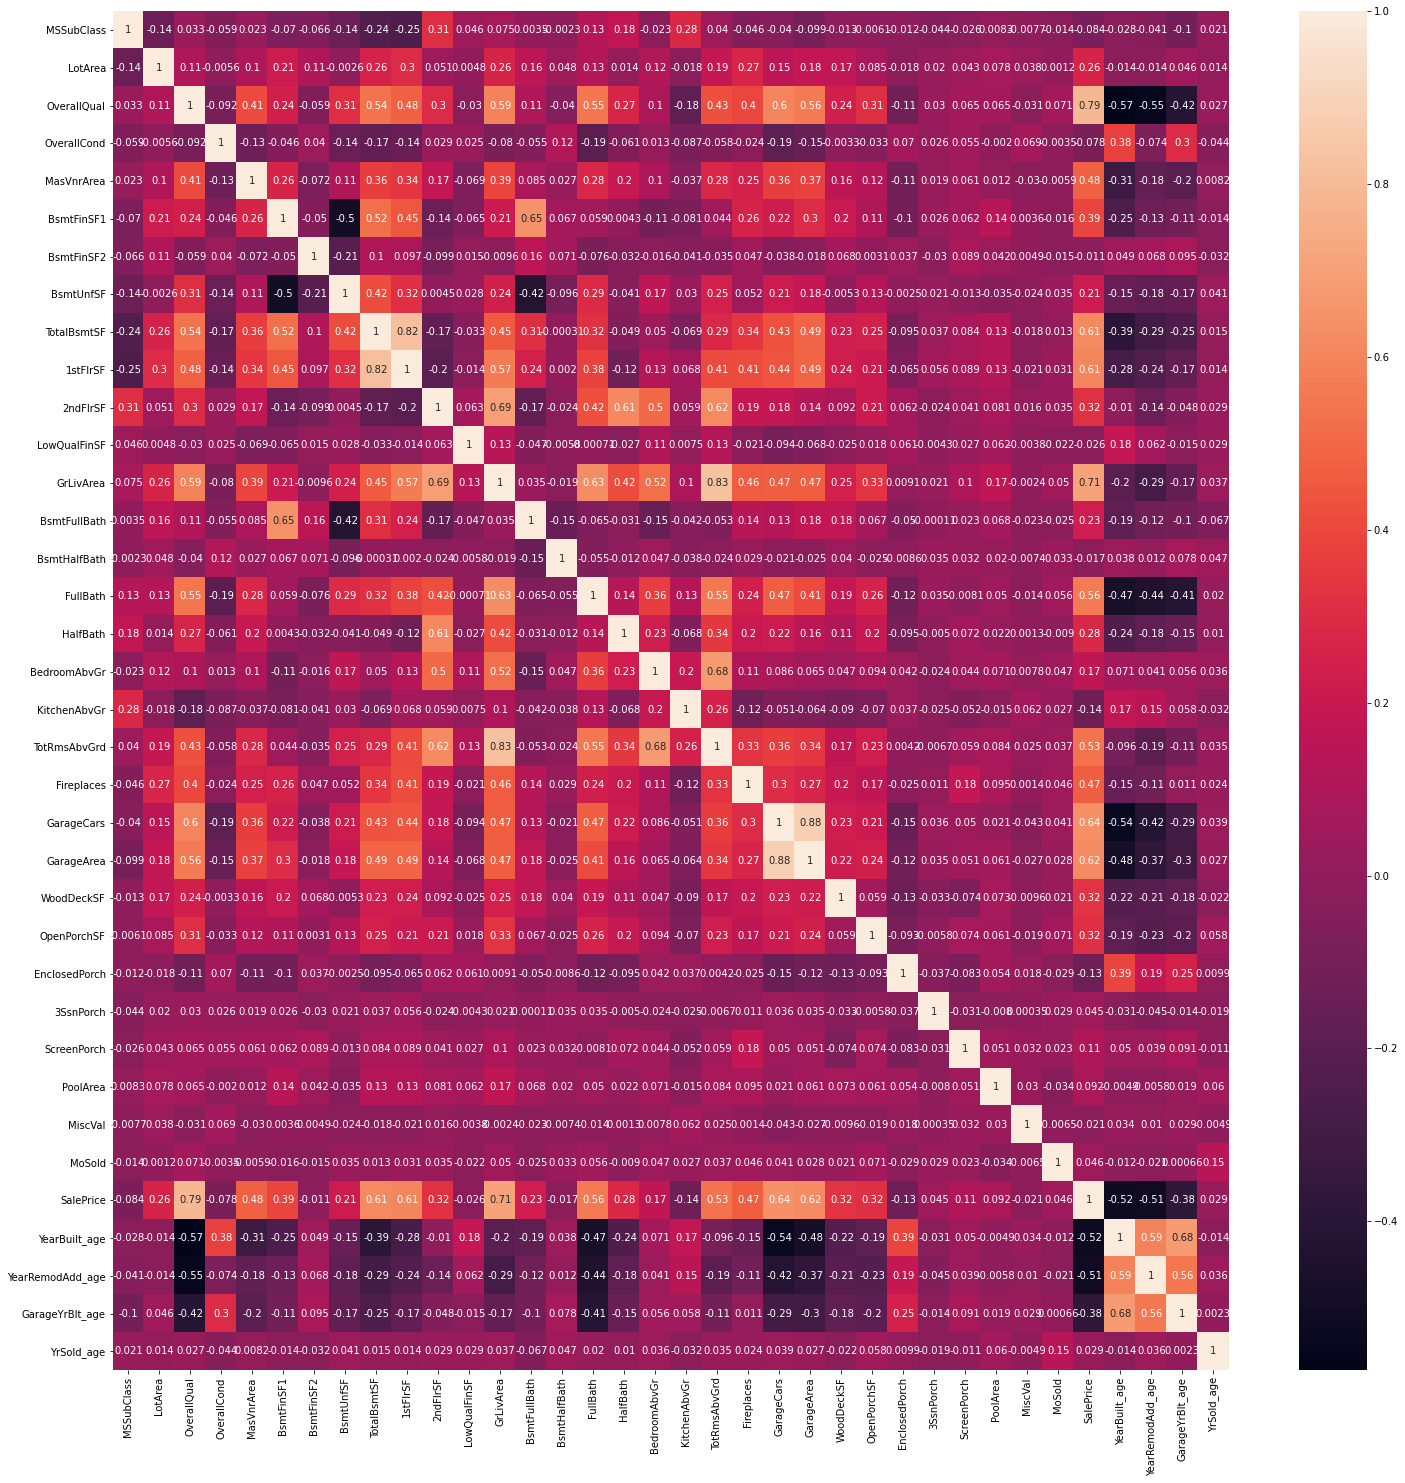

In [88]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.select_dtypes(exclude=['object']).corr(), annot=True)
plt.show()

In [119]:
df.shape

(1460, 71)

In [120]:
df.select_dtypes(exclude=['object']).describe([0.99])

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,YearBuilt_age,YearRemodAdd_age,GarageYrBlt_age,YrSold_age
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890,38.732192,25.134247,29.691096,2.184247
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883,30.202904,20.645407,25.121824,1.328095
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000,0.000000,0.000000,-1.000000,0.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000,37.000000,16.000000,25.500000,2.000000
99%,190.000000,37567.640000,10.000000,9.000000,791.280000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,...,261.050000,168.000000,268.050000,0.000000,700.000000,442567.010000,110.820000,60.000000,92.820000,4.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000,138.000000,60.000000,110.000000,4.000000


## Dropping outliers

In [122]:
num_col = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','1stFlrSF','GrLivArea','OpenPorchSF',
           'EnclosedPorch','3SsnPorch',
           'ScreenPorch' ,'PoolArea','MiscVal','SalePrice']
def drop_outliers(x):
    for col in num_col:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df = drop_outliers(df)

In [123]:
df.shape

(1441, 71)

In [124]:
df[['LandSlope','ExterQual','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
            'HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond',
             'ExterCond','LotShape']].head()

,LandSlope,ExterQual,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond,ExterCond,LotShape
0,Gtl,Gd,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,Reg
1,Gtl,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA,TA,Reg
2,Gtl,Gd,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1
3,Gtl,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA,TA,IR1
4,Gtl,Gd,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA,TA,IR1


## Mapping ordinal categorical variables to  discrete numbers

In [125]:
df['LandSlope'] = df.LandSlope.map({'Gtl':0,'Mod':1,'Sev':2})
df['ExterQual'] = df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['BsmtQual'] = df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtCond'] = df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['BsmtExposure'] = df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
df['BsmtFinType1'] = df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['BsmtFinType2'] = df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
df['HeatingQC'] = df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['CentralAir'] = df.CentralAir.map({'N':0,'Y':1})
df['KitchenQual'] = df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['GarageFinish'] = df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})
df['GarageQual'] = df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['GarageCond'] = df.GarageCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
df['ExterCond'] = df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
df['LotShape'] = df.LotShape.map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})

## Getting dummies for categorical variables

In [126]:
dummy_col = pd.get_dummies(df[['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']],
                           drop_first=True)

In [127]:
df = pd.concat([df, dummy_col],axis='columns')

df = df.drop(['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','Condition2','BldgType',
             'HouseStyle','RoofStyle','RoofMatl','Exterior1st',  'Exterior2nd','MasVnrType','Foundation',
             'Heating','Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition'],axis='columns')

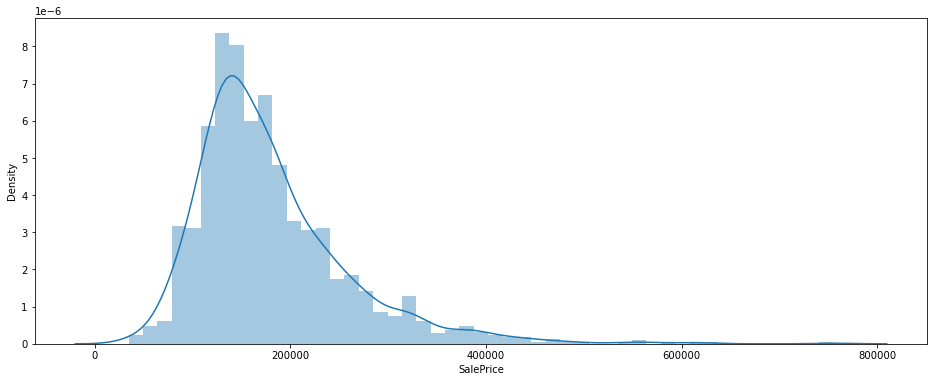

In [129]:
plt.figure(figsize=(16,6))
sns.distplot(df.SalePrice)
plt.show()

## Splitting the data into train and test

In [132]:
df_train,df_test = train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)

In [133]:
num_col = ['MSSubClass','LotArea','OverallQual','OverallCond',
           'MasVnrArea','BsmtFinSF1',
           'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
           'LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
           'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars',
           'GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
           'ScreenPorch','PoolArea','MiscVal','SalePrice']

## Using Standardisation to transform the numerical variables

In [134]:
scaler = StandardScaler()
df_train[num_col] = scaler.fit_transform(df_train[num_col])
df_test[num_col] = scaler.transform(df_test[num_col])

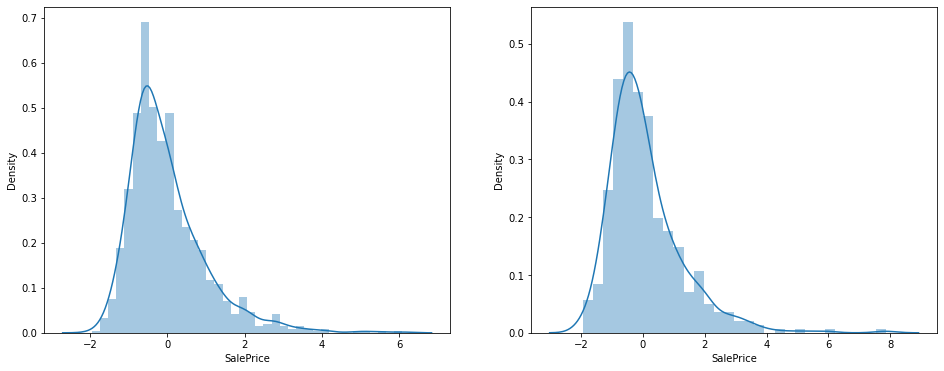

In [136]:
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.distplot(df_train.SalePrice)
plt.subplot(1, 2, 2)
sns.distplot(df_test.SalePrice)
plt.show()

In [137]:
y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

### Using RFE to select most relevant features

In [139]:
lm  = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,70)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=70)

In [140]:
rfe_scores = pd.DataFrame(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
rfe_scores.columns = ['Column_Names','Status','Rank']

In [143]:
rfe_sel_columns = list(rfe_scores[rfe_scores.Status==True].Column_Names)
rfe_sel_columns

['OverallQual',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'KitchenQual',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'LandContour_HLS',
 'LotConfig_CulDSac',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Condition1_RRAe',
 'Condition2_Feedr',
 'Condition2_PosN',
 'HouseStyle_1.5Unf',
 'HouseStyle_1Story',
 'HouseStyle_SFoyer',
 'HouseStyle_SLvl',
 'RoofStyle_Gable',
 'RoofStyle_Gambrel',
 'RoofStyle_Hip',
 'RoofMatl_WdShngl',
 'Exterior1st_BrkComm',
 'Exterior1st_CBlock',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior1st_MetalSd',
 'Exterior1st_Plywood',
 'Exterior1st_Stucco',
 'Exterior1st_Wd Sdng',
 'Exterior1st_WdShing',
 'Exterior2nd_Brk Cmn',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exteri

In [144]:
X_train = X_train[rfe_sel_columns]
X_test = X_test[rfe_sel_columns]

## Lasso Regression

In [145]:
lm = Lasso(alpha=0.001)
lm.fit(X_train,y_train)

y_train_pred = lm.predict(X_train)
print(r2_score(y_true=y_train,y_pred=y_train_pred))

y_test_pred  = lm.predict(X_test)
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8850017847115416
0.8316094363956852


In [146]:
model_parameter = list(lm.coef_)
model_parameter.insert(0,lm.intercept_)
model_parameter = [round(x,3) for x in model_parameter]
col = df_train.columns
col.insert(0,'Constant')
list(zip(col,model_parameter))

[('MSSubClass', -1.126),
 ('LotArea', 0.254),
 ('LotShape', 0.15),
 ('LandSlope', 0.021),
 ('OverallQual', -0.0),
 ('OverallCond', 0.115),
 ('MasVnrArea', 0.0),
 ('ExterQual', 0.062),
 ('ExterCond', -0.027),
 ('BsmtQual', 0.373),
 ('BsmtCond', 0.196),
 ('BsmtExposure', 0.0),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.154),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.262),
 ('BsmtUnfSF', 0.206),
 ('TotalBsmtSF', 0.17),
 ('HeatingQC', 0.162),
 ('CentralAir', -0.143),
 ('1stFlrSF', 0.424),
 ('2ndFlrSF', 0.425),
 ('LowQualFinSF', 0.284),
 ('GrLivArea', 0.359),
 ('BsmtFullBath', 0.272),
 ('BsmtHalfBath', -0.149),
 ('FullBath', -0.008),
 ('HalfBath', -0.0),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', 0.162),
 ('KitchenQual', 0.17),
 ('TotRmsAbvGrd', 0.108),
 ('Fireplaces', -0.058),
 ('GarageFinish', -0.0),
 ('GarageCars', 0.0),
 ('GarageArea', 0.463),
 ('GarageQual', -0.0),
 ('GarageCond', -0.0),
 ('WoodDeckSF', -0.094),
 ('OpenPorchSF', -0.0),
 ('EnclosedPorch', -0.054),
 ('3SsnPorch', -0.084)

### Using KFold Cross Validation to find best value of Alpha using GridSearchCV

In [147]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

### Checking the value of cofficients for various parameters

In [148]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.015857,0.001696,0.001795,3.986244e-04,0.001,{'alpha': 0.001},0.800086,0.862156,0.846055,0.851083,...,0.887730,0.888652,0.877684,0.885735,0.886638,0.886074,0.887779,0.886053,0.886050,0.002933
1,0.005086,0.001041,0.001995,3.234067e-07,0.010,{'alpha': 0.01},0.797475,0.820264,0.825381,0.818811,...,0.851493,0.847906,0.839938,0.849056,0.851199,0.847011,0.850556,0.847678,0.848754,0.003481
2,0.002693,0.000639,0.001596,4.886750e-04,0.100,{'alpha': 0.1},0.798858,0.732412,0.777602,0.741042,...,0.789677,0.786834,0.776987,0.788833,0.793520,0.786827,0.785929,0.787389,0.787194,0.003962
3,0.002693,0.000457,0.001895,2.992236e-04,1.000,{'alpha': 1.0},-0.012775,-0.017739,-0.003177,-0.011958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.002593,0.000489,0.001397,4.879133e-04,5.000,{'alpha': 5.0},-0.012775,-0.017739,-0.003177,-0.011958,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


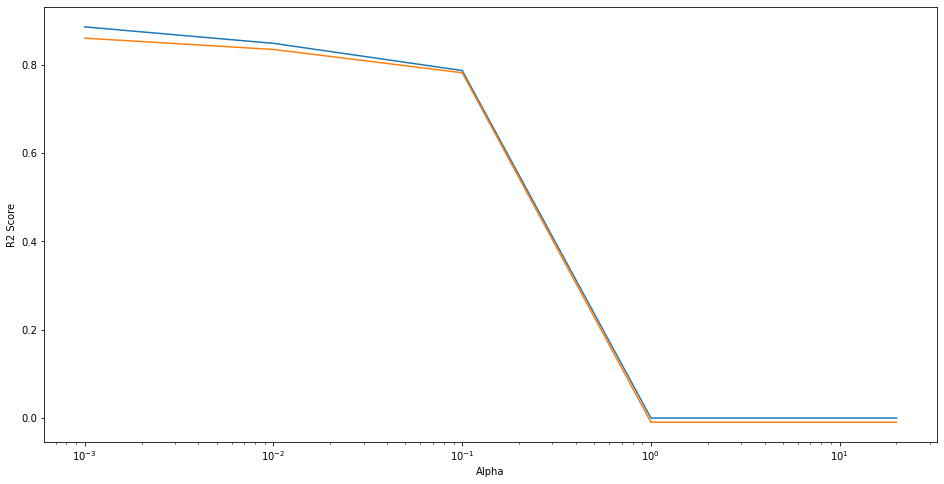

In [149]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

### Best value for alpha

In [150]:
model_cv.best_params_

{'alpha': 0.001}

### Training the model for best value of alpha

In [169]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8850017847115416
0.8316094363956852


### Checking most relevant features

In [170]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
35,GarageArea,0.462981
68,Neighborhood_IDOTRR,0.453668
21,2ndFlrSF,0.424857
20,1stFlrSF,0.424110
9,BsmtQual,0.373444
23,GrLivArea,0.358693
64,Neighborhood_CollgCr,0.296654
22,LowQualFinSF,0.284126
24,BsmtFullBath,0.271836
15,BsmtFinSF2,0.261617


## Ridge Regression

In [153]:
ridge = Ridge(alpha=0.001)
ridge.fit(X_train,y_train)

y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))
y_test_pred = ridge.predict(X_test)
print(r2_score(y_test,y_test_pred))

0.8915037178845113
0.8264555421881822


### Using KFold Cross Validation to find best value of Alpha using GridSearchCV

In [154]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

### Checking the value of cofficients for various parameters

In [155]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.003291,0.000638,0.001895,0.000698,0.001,{'alpha': 0.001},0.815189,0.848861,0.847228,0.848792,...,0.894335,0.896224,0.884665,0.891839,0.893200,0.892899,0.893755,0.893348,0.892826,0.002946
1,0.002892,0.000538,0.001895,0.000291,0.010,{'alpha': 0.01},0.815759,0.849027,0.847261,0.848874,...,0.894335,0.896223,0.884665,0.891839,0.893199,0.892899,0.893754,0.893347,0.892825,0.002946
2,0.002793,0.000399,0.001596,0.000489,0.100,{'alpha': 0.1},0.819646,0.850294,0.847549,0.849585,...,0.894278,0.896153,0.884609,0.891787,0.893158,0.892842,0.893697,0.893285,0.892764,0.002942
3,0.002992,0.000446,0.001396,0.000488,0.200,{'alpha': 0.2},0.821690,0.851230,0.847794,0.850191,...,0.894149,0.895996,0.884482,0.891671,0.893062,0.892712,0.893575,0.893144,0.892629,0.002933
4,0.002892,0.000537,0.001596,0.000489,0.500,{'alpha': 0.5},0.822826,0.852950,0.848267,0.851347,...,0.893617,0.895355,0.883964,0.891187,0.892656,0.892171,0.893085,0.892562,0.892088,0.002909


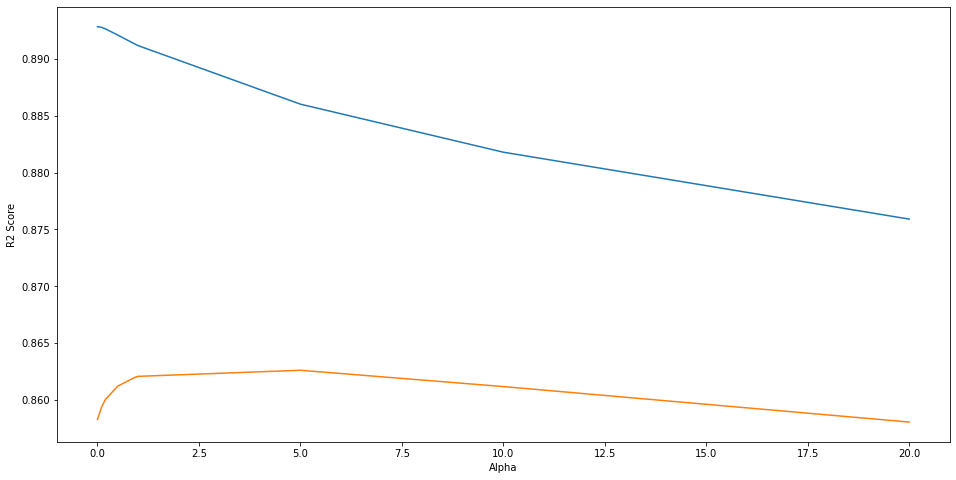

In [156]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.show()

### Best value for alpha

In [157]:
model_cv.best_params_

{'alpha': 5.0}

### Training the model for best value of alpha

In [165]:
ridge = Ridge(alpha = 5.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8814882295435481
0.8283931101825233


### Checking most relevant features

In [166]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
21,2ndFlrSF,0.328109
20,1stFlrSF,0.302254
1,LotArea,0.268319
64,Neighborhood_CollgCr,0.264442
68,Neighborhood_IDOTRR,0.258399
23,GrLivArea,0.244017
9,BsmtQual,0.235227
15,BsmtFinSF2,0.220746
35,GarageArea,0.213264
63,Neighborhood_ClearCr,0.211686


## Using Lasso Regression for final model as R2_score is highest for it for test set

In [163]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8850017847115416
0.8316094363956852


In [164]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
35,GarageArea,0.462981
68,Neighborhood_IDOTRR,0.453668
21,2ndFlrSF,0.424857
20,1stFlrSF,0.424110
9,BsmtQual,0.373444
23,GrLivArea,0.358693
64,Neighborhood_CollgCr,0.296654
22,LowQualFinSF,0.284126
24,BsmtFullBath,0.271836
15,BsmtFinSF2,0.261617


### Most Relevant Features

In [ ]:
#Garage Area
#Neighborhood_IDOTRR
#2ndFlrSF
#1stFlrSF
#BsmtQual